In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
#Adam (almost)
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
diff =y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss ,[w1, w2])
learning_rate = 1e-4
frist_moment_w1 = 0
frist_moment_w2 = 0
second_moment_w1 = 0
second_moment_w2 = 0
beta1 = 0.9
beta2 = 0.999
frist_moment_w1 = beta1 * frist_moment_w1 + (1-beta1) * grad_w1
second_moment_w1 = beta2 * second_moment_w2 + (1-beta2) * grad_w1 * grad_w1
frist_moment_w2 = beta1 * frist_moment_w2 + (1-beta1) * grad_w2
second_moment_w2 = beta2 * second_moment_w2 + (1-beta2) * grad_w2 * grad_w2
W1 = w1 - learning_rate * frist_moment_w1 / (tf.sqrt(second_moment_w1) + 1e-7)
W2 = w2 - learning_rate * frist_moment_w2 / (tf.sqrt(second_moment_w2) + 1e-7)
new_w1 = w1.assign(W1)
new_w2 = w2.assign(W2)
updates = tf.group(new_w1,new_w2)

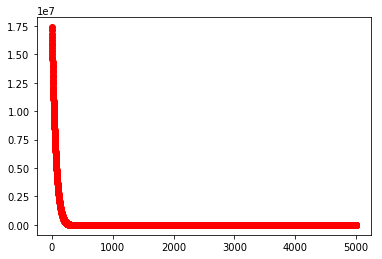

[17101038.0, None] [302.36816, None]


In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.rand (N, D), y: np.random.rand (N, D)}
    step = 5000
    loss_summary = []
    for i in range(step):
        out = sess.run([loss, updates], feed_dict=values)
        loss_val = out
        loss_summary.append(loss_val)
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[1],loss_summary[step-1])

In [7]:
#Adam (full form)
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
diff =y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss ,[w1, w2])
learning_rate = 1e-3
frist_moment_w1 = 0
frist_moment_w2 = 0
second_moment_w1 = 0
second_moment_w2 = 0
beta1 = 0.9
beta2 = 0.999
step = 50
frist_moment_w1 = beta1 * frist_moment_w1 + (1-beta1) * grad_w1
second_moment_w1 = beta2 * second_moment_w2 + (1-beta2) * grad_w1 * grad_w1
frist_moment_w2 = beta1 * frist_moment_w2 + (1-beta1) * grad_w2
second_moment_w2 = beta2 * second_moment_w2 + (1-beta2) * grad_w2 * grad_w2
frist_unbias_w1 = frist_moment_w1 / (1 - beta1 ** step)
frist_unbias_w2 = frist_moment_w2 / (1 - beta1 ** step)
second_unbias_w1 = second_moment_w1 / (1- beta2 ** step)
second_unbias_w2 = second_moment_w2 / (1- beta2 ** step)
W1 = w1 - learning_rate * frist_unbias_w1 / (tf.sqrt(second_unbias_w1) + 1e-7)
W2 = w2 - learning_rate * frist_unbias_w2 / (tf.sqrt(second_unbias_w2) + 1e-7)
new_w1 = w1.assign(W1)
new_w2 = w2.assign(W2)
updates = tf.group(new_w1,new_w2)

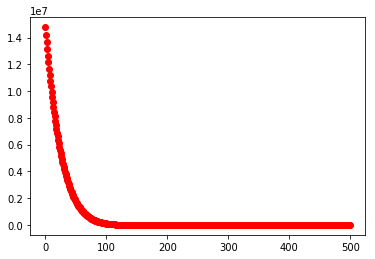

[14207548.0, None] [334.7825, None]


In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.rand (N, D), y: np.random.rand (N, D)}
    loss_summary = []
    step = 500
    for i in range(step):
        out = sess.run([loss, updates], feed_dict=values)
        loss_val = out
        loss_summary.append(loss_val)
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[1],loss_summary[step-1])